<a href="https://colab.research.google.com/github/Dhilip546/django/blob/main/dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf # machine learning library
from tensorflow import keras
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential

from keras.layers import Conv2D, Lambda, MaxPooling2D

from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/DL/dataset/test.csv')
train = pd.read_csv('/content/drive/MyDrive/DL/dataset/train.csv')

In [ ]:
train.shape
test.shape

(28000, 784)

In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.drop(['label'], 1).values
y = train['label'].values

<ipython-input-8-a59f6058bd32>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop(['label'], 1).values


In [ ]:
X = X / 255.0

In [ ]:
X = X.reshape(-1,28,28,1)

In [ ]:
y = to_categorical(y)
y.shape

(42000, 10)

In [ ]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

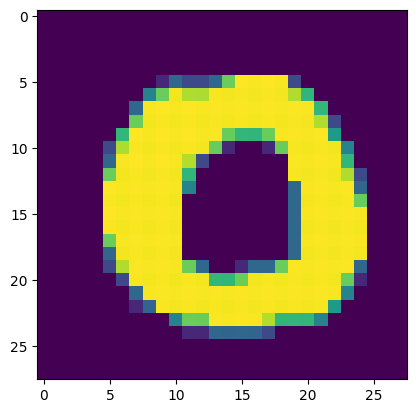

In [ ]:

image = X_train[2,:]
plt.imshow(image)
plt.show()

In [ ]:
model=Sequential()


model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))



In [ ]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1182/1182 [==============================] - 20s 6ms/step - loss: 0.1168 - accuracy: 0.9652
Epoch 2/10
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0553 - accuracy: 0.9831
Epoch 3/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0433 - accuracy: 0.9864
Epoch 4/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0352 - accuracy: 0.9890
Epoch 5/10
1182/1182 [==============================] - 9s 7ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 6/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0260 - accuracy: 0.9922
Epoch 7/10
1182/1182 [==============================] - 10s 9ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 8/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0189 - accuracy: 0.9951
Epoch 9/10
1182/1182 [==============================] - 8s 7ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 10/10
1182/1182 [==============================] - 7s 6ms/step - loss: 0.0

In [ ]:
# Evaluate the model
model.evaluate(X_test,y_test)

132/132 [==============================] - 1s 5ms/step - loss: 3.3870e-07 - accuracy: 0.9917


[3.387011986433208e-07, 0.9916666746139526]

In [ ]:
test = test.values
print(len(test))
test = test / 255.0
test= test.reshape(-1,28,28,1)

28000


In [ ]:
test.shape

(28000, 28, 28, 1)

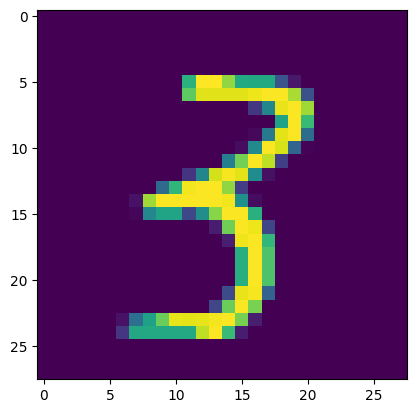

1/1 [==============================] - 0s 20ms/step
Model says the number is 3


In [ ]:
import random
idx = random.randint(0, len(test))
image = test[idx, :]
plt.imshow(image)
plt.show()


# Make prediction for one image. Has to be reshaped
pred = model.predict(image.reshape(1, 28, 28, 1))
pred_lst = pred[0,:].tolist()
max_prob = max(pred_lst)
pred_idx = pred_lst.index(max_prob)

print("Model says the number is", pred_idx)

In [ ]:
preds = model.predict(test)

875/875 [==============================] - 2s 2ms/step


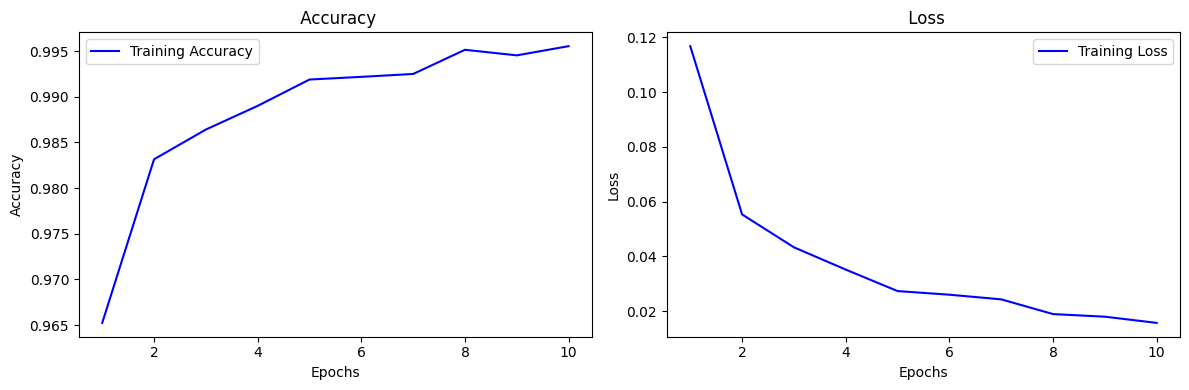

In [ ]:
# Get accuracy and loss values from the history object
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Create an array for the x-axis (epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.title(' Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title(' Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!git clone https://github.com/Dhilip546/Deeplearning.git


fatal: destination path 'Deeplearning' already exists and is not an empty directory.


In [ ]:
!cp /content/drive/MyDrive/DL/dl.ipynb /content/drive/MyDrive/Deeplearning

In [ ]:
%cd /content/drive/MyDrive/Deeplearning

[Errno 20] Not a directory: '/content/drive/MyDrive/Deeplearning'
/content/Deeplearning


In [ ]:
!git add /content/drive/MyDrive/DL/dl.ipynb

fatal: /content/drive/MyDrive/DL/dl.ipynb: '/content/drive/MyDrive/DL/dl.ipynb' is outside repository at '/content/Deeplearning'
